# Kapittel 16

N = 10

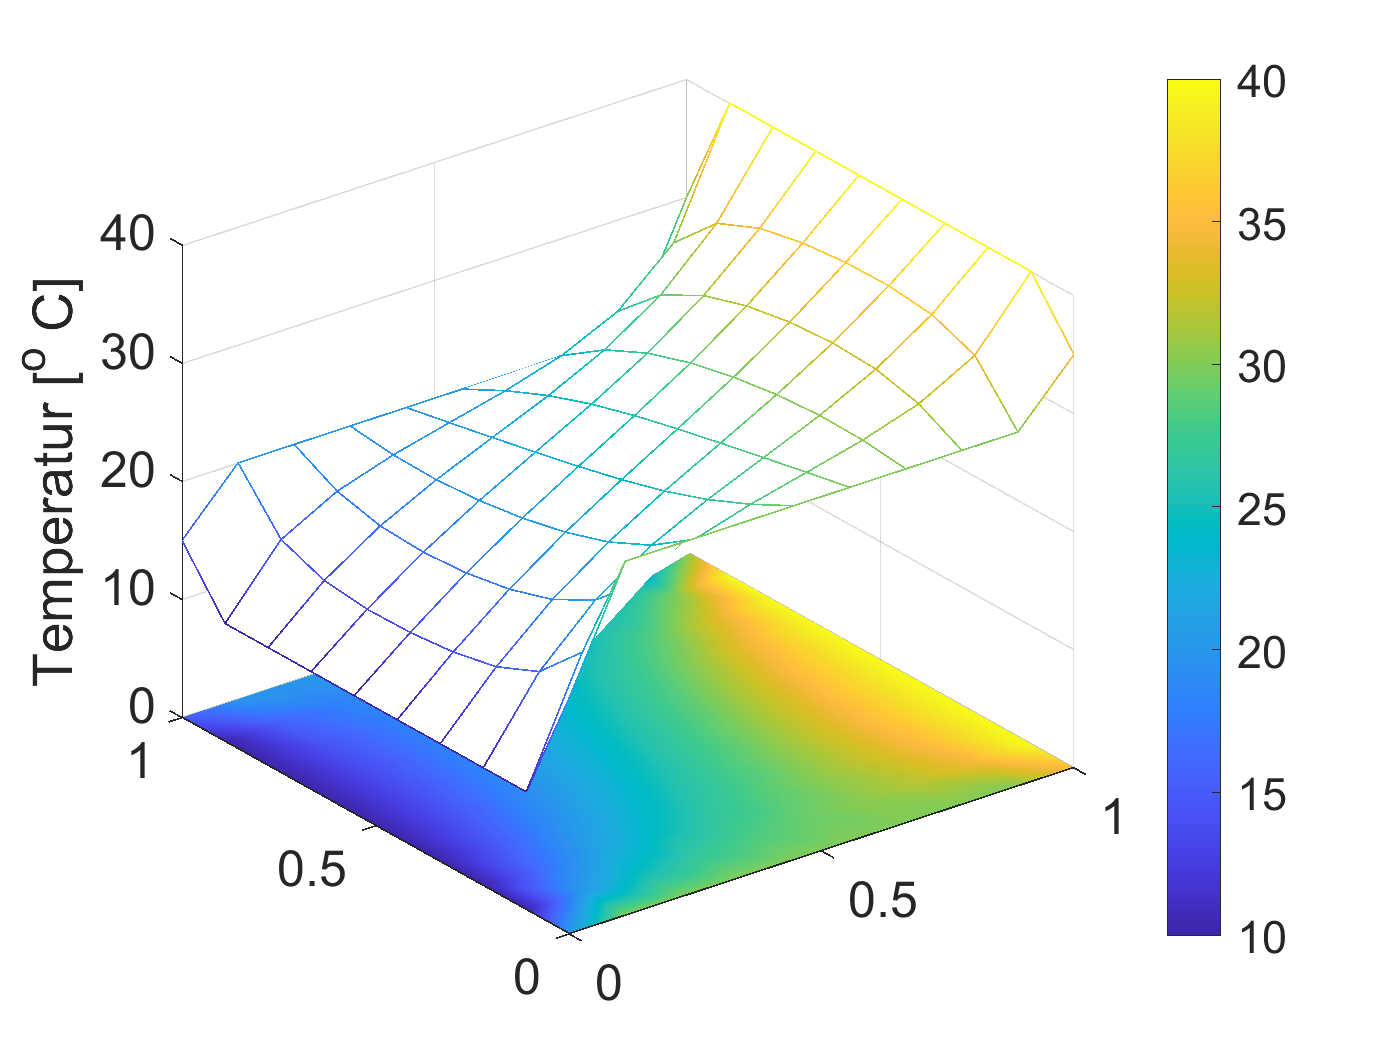

In [6]:
% Temperaturfordeling.m

% Skript som estimerer temperaturfordelinga på ei
% kvadratisk metallplate der temperaturane på
% sidekantane er fikserte. Dette gjer den ved å
% iterere på temperaturfordelingsmatrisa ved å setje
% verdien i kvart element til gjennomsnittet av
% nabopunkta. Dette blir gjentatt til dess matrisa
% blir praktisk tala uendra ved nye iterasjonar.

% Fikserer kanttemperaturar
TkantVenstre=10;
TkantOver=30;
TkantHoegre=40;
TkantUnder=20;

% Bestemmer feilmarginen; gitt ved normen til matrisa.
Tol=1e-2;

% Bestemmer inndelinga (blir lest inn frå kommandolinja)
%N=input('Kor fin oppdeling vil du ha? ');
N = 10

%
% Set opp startmatrisa
%
% Allokerer temperaturmatrisa Tmat og kopi
Tmat=zeros(N,N);
TmatGml=Tmat;

% Startfordeling med tilfeldige tal frå max til min
Min=min([TkantVenstre TkantOver TkantHoegre TkantUnder]);
Max=max([TkantVenstre TkantOver TkantHoegre TkantUnder]);
Tmat(2:(N-1),2:(N-1))=ones(N-2,N-2)*Min+...
(Max-Min)*rand(N-2,N-2);

% Kantar
Tmat(2:(N-1),1)=TkantVenstre;
Tmat(1,2:(N-1))=TkantOver;
Tmat(2:(N-1),N)=TkantHoegre;
Tmat(N,2:(N-1))=TkantUnder;

% Hjørna (gjennomsnitt)
Tmat(1,1)=(TkantVenstre+TkantOver)/2;
Tmat(1,N)=(TkantOver+TkantHoegre)/2;
Tmat(N,N)=(TkantHoegre+TkantUnder)/2;
Tmat(N,1)=(TkantUnder+TkantVenstre)/2;


% Itererer til det sluttar å endre seg
while norm(Tmat-TmatGml)>Tol
  TmatGml=Tmat;       % Kopierer matrisa
  for r=2:(N-1)
    for s=2:(N-1)
      % Omdefinerer temp. til gjennomsnitt
      Tmat(r,s)=(Tmat(r,s-1)+Tmat(r,s+1)+...
      Tmat(r-1,s)+Tmat(r+1,s))/4;
    end
  end
end

% Plottar sluttfordelinga
% Vektor med verdiar på x- og y-aksane
XYvektor=0:1/(N-1):1;
mesh(XYvektor,XYvektor,Tmat)    % Rutenett-plott
hold on
pcolor(XYvektor,XYvektor,Tmat)  % Farge-plott
set(gca,'fontsize',15)
colorbar                        % Søyle med fargekoden
zlabel('Temperatur [^o C]')     % Namn på z-akse
shading interp                  % Skuggelegginga
hold off
